<a href="https://colab.research.google.com/github/kn201dvv/DataAnalys/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання 1. Провести аналіз на наборі даних flats.csv.

З бібліотек знадобляться NumPy і Pandas.

Завантажте файл і отримайте загальну інформацію про
файл.

Знайти:
- в кожному місті саму маленьку за площею квартиру;
- в кожному місті квартиру з максимальною кількістю
кімнат;
- скільки продається трикімнатних квартир у Львові і
Одесі
- саму дорогу і саму дешеву квартиру в місті.


In [36]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('flats.csv')

Saving flats.csv to flats (2).csv


In [15]:
data.groupby('Місто')['Загальна_площа'].min()

Місто
Івано-Франківськ         102
Вінниця                  100
Дніпропетровськ          102
Запоріжжя                103
Києво-Святошинський       39
Київ                     100
Львів                  141,1
Миколаїв                 142
Одеса                    102
Рівне                    108
Тернопіль                100
Харків                    15
Хмельницький             105
Name: Загальна_площа, dtype: object

In [16]:
data.groupby('Місто')['Кімнат'].max()

Місто
Івано-Франківськ       4
Вінниця                6
Дніпропетровськ        5
Запоріжжя              5
Києво-Святошинський    3
Київ                   5
Львів                  6
Миколаїв               4
Одеса                  6
Рівне                  3
Тернопіль              4
Харків                 3
Хмельницький           4
Name: Кімнат, dtype: int64

In [26]:
data_reset = data.reset_index()
data_reset[(data_reset['Місто'].isin(['Львів', 'Одеса'])) & (data_reset['Кімнат'] == 3)]['index'].count()

13

In [21]:
data.groupby('Місто')['Ціна'].agg(['min', 'max'])

,min,max
Місто,,
Івано-Франківськ,10500.0,2425000.0
Вінниця,11500.0,4000000.0
Дніпропетровськ,27500.0,5750000.0
Запоріжжя,425000.0,2750000.0
Києво-Святошинський,10902.0,1750000.0
Київ,11000.0,12250000.0
Львів,16000.0,4125000.0
Миколаїв,297500.0,5150000.0
Одеса,25000.0,5750000.0


In [30]:
data['Загальна_площа']
data['Загальна_площа'] = pd.to_numeric(data['Загальна_площа'].astype(
'str').str.replace(',','.'))
data.groupby('Місто')
print(data['Місто'].value_counts(sort=False))
data = data[(data['Кімнат']==3) & (data['Місто']!='Києво-Святошинський')]
print(data['Місто'].value_counts(sort=True))
data.groupby('Місто')['Загальна_площа'].mean()
data[(data['Кімнат'] == 2) & (data['Загальна_площа'] >= 60)]
#data['Загальна_площа'] = pd.to_numeric(df['Загальна_площа'], errors='coerce')
print('СЕРЕДНЄ ЗНАЧЕННЯ ПЛОЩІ')
print(data['Загальна_площа'].mean())
print('\nСЕРЕДНЬОКВАДРАТИЧНЕ ВІДХИЛЕННЯ')
print( data['Загальна_площа'].std())

Вінниця             60
Дніпропетровськ      8
Запоріжжя            8
Івано-Франківськ    13
Київ                50
Львів                2
Миколаїв             5
Одеса               11
Рівне                6
Тернопіль           24
Харків               3
Хмельницький        22
Name: Місто, dtype: int64
Вінниця             60
Київ                50
Тернопіль           24
Хмельницький        22
Івано-Франківськ    13
Одеса               11
Дніпропетровськ      8
Запоріжжя            8
Рівне                6
Миколаїв             5
Харків               3
Львів                2
Name: Місто, dtype: int64
СЕРЕДНЄ ЗНАЧЕННЯ ПЛОЩІ
86.31948113207545

СЕРЕДНЬОКВАДРАТИЧНЕ ВІДХИЛЕННЯ
24.697024289056355


Завдання 2. Графічне представлення елементів описової статистики

- Побудуйте коробчасту діаграму для візуалізації
розподілу цін в залежності від кількостікімнат.

- Побудуйте графік розсіювання, який відображатиме
залежність загальної кількості кімнат від ціни.

- Побудуйте гістограму для оцінки розподілу ціни
квартир

- Побудуйте гістограму (використовується для оцінки
форми розподілу кількісної змінної) розподілу квартир, які
продаються за загальною площею. Залежно від розміру інтервалу
форма гістограми може змінюватися. Змініть інтервал з 25 м.кв. до
50.


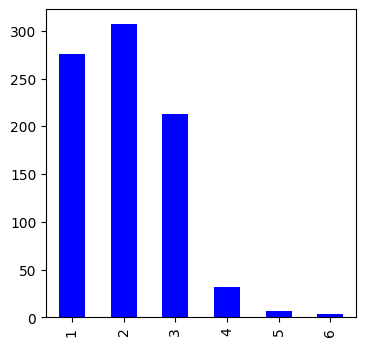

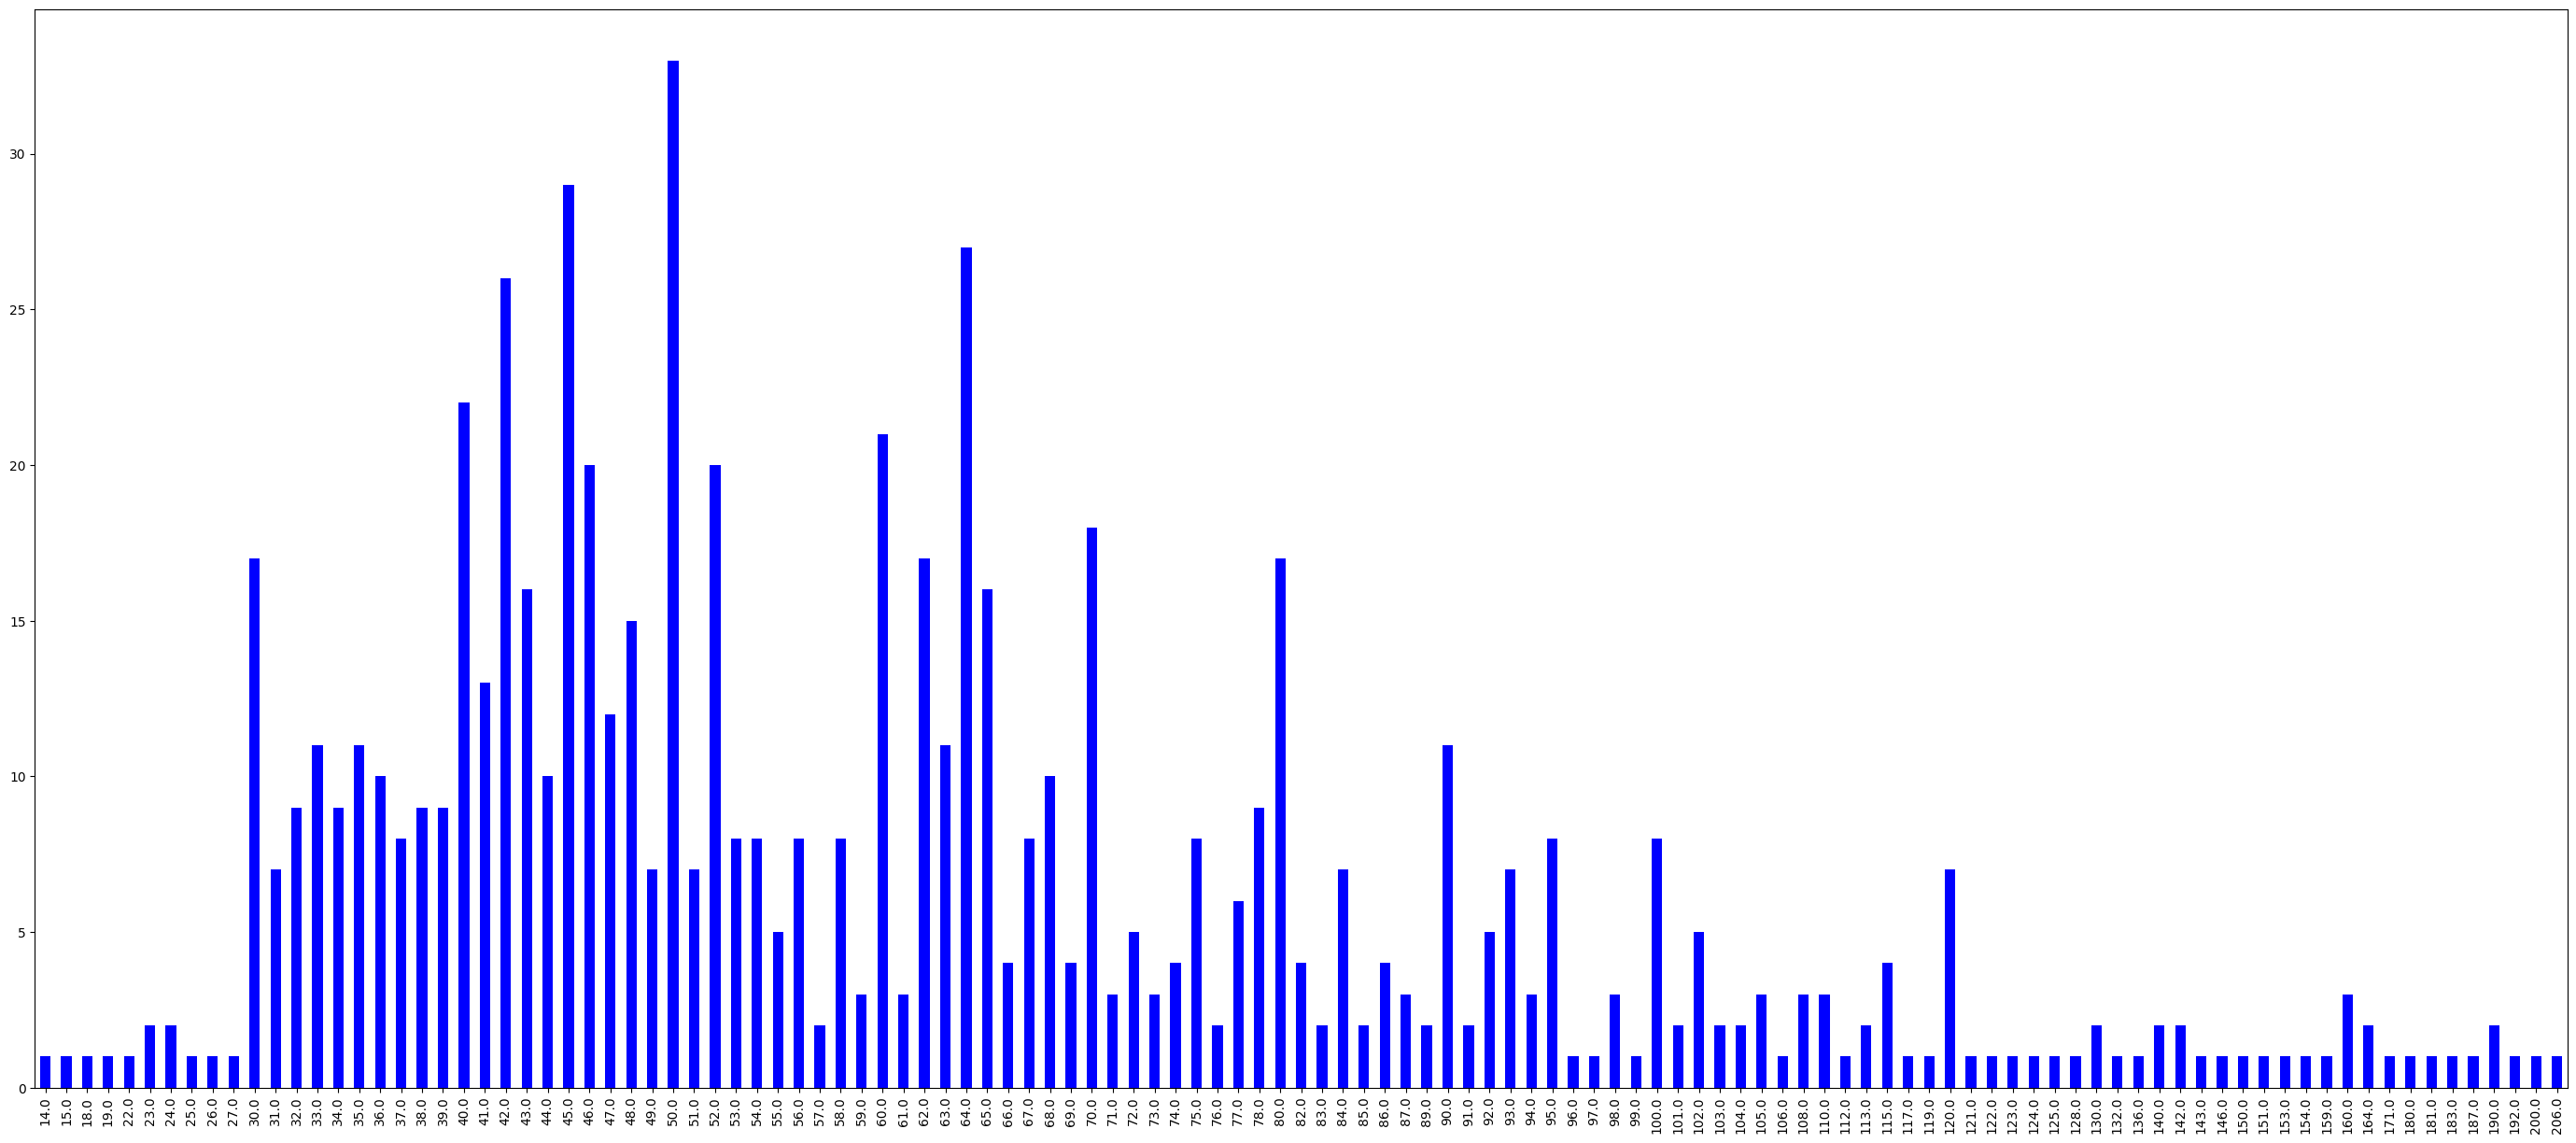

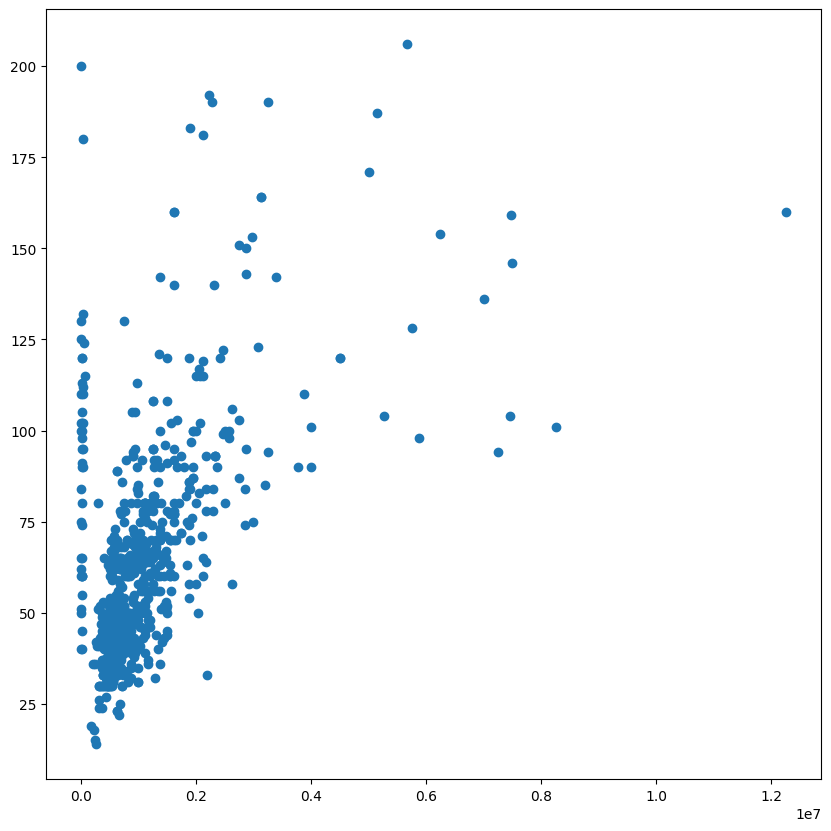

<Axes: xlabel='Ціна', ylabel='Місто'>

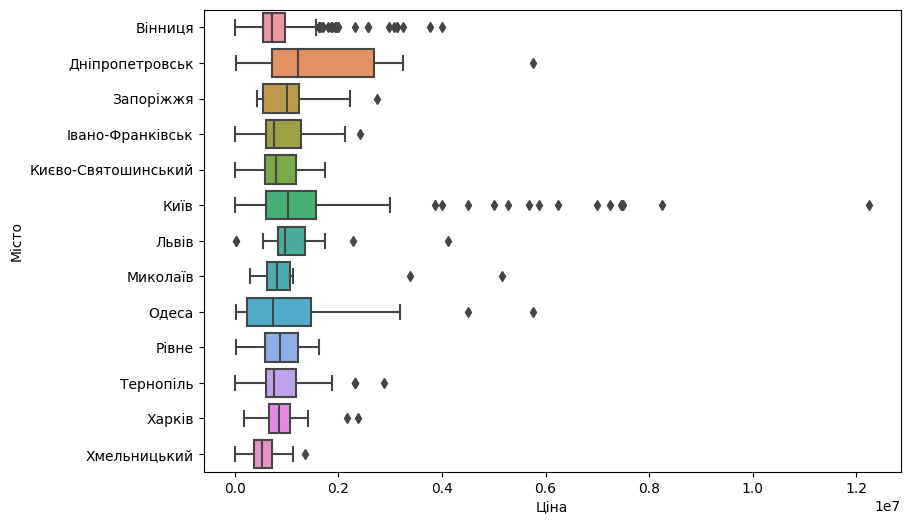

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
graphic = data['Кімнат'].value_counts().sort_index().plot(kind='bar', figsize=(4,4), color='blue')
plt.show()
data['Загальна_площа'] = pd.to_numeric(data['Загальна_площа'], errors='coerce')
graphic = data['Загальна_площа'].value_counts().sort_index().plot(kind='bar', figsize=(35,15), color='blue')
plt.show()
data['Загальна_площа'] = pd.to_numeric(data['Загальна_площа'], errors='coerce')
fig, xy = plt.subplots(figsize=(10,10))
xy.scatter(x=data['Ціна'], y=data['Загальна_площа'])
plt.show()
figure = plt.figure(1, figsize=(9, 6))
sns.boxplot(x='Ціна',y='Місто',data=data)


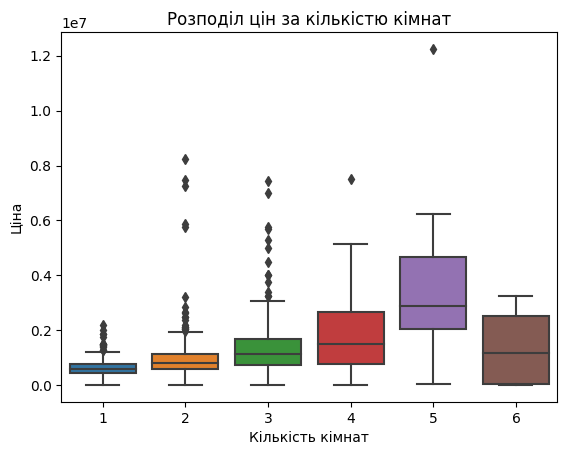

In [40]:
sns.boxplot(x='Кімнат', y='Ціна', data=data)
plt.xlabel('Кількість кімнат')
plt.ylabel('Ціна')
plt.title('Розподіл цін за кількістю кімнат')
plt.show()

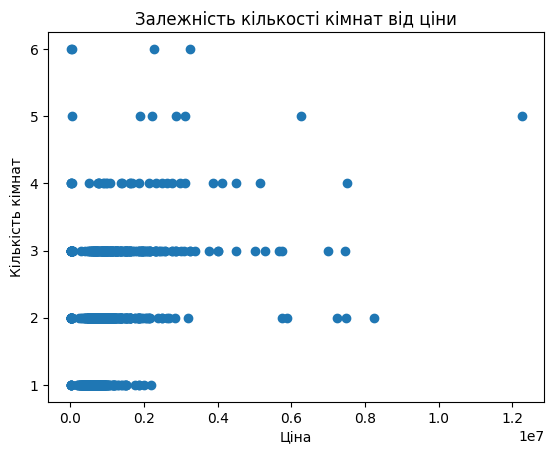

In [44]:
plt.scatter(data['Ціна'], data['Кімнат'])
plt.xlabel('Ціна')
plt.ylabel('Кількість кімнат')
plt.title('Залежність кількості кімнат від ціни')
plt.show()

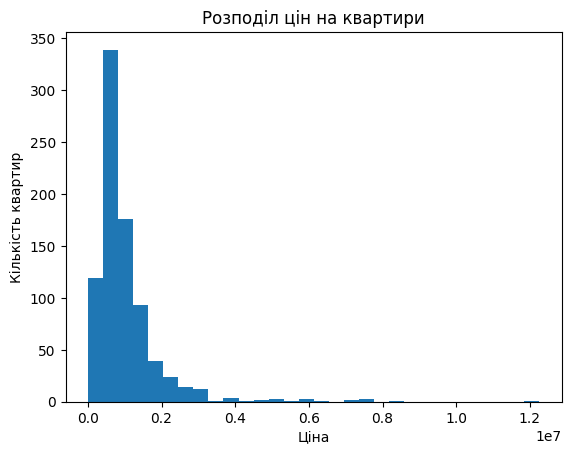

In [46]:
import matplotlib.pyplot as plt

plt.hist(data['Ціна'], bins=30)
plt.xlabel('Ціна')
plt.ylabel('Кількість квартир')
plt.title('Розподіл цін на квартири')
plt.show()

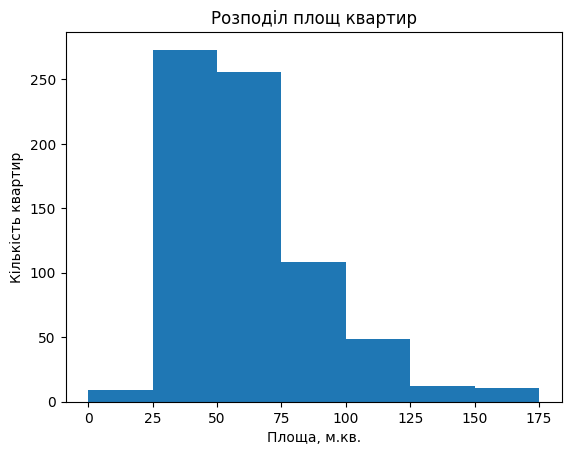

In [47]:
import matplotlib.pyplot as plt

plt.hist(data['Загальна_площа'], bins=range(0, 200, 25))
plt.xlabel('Площа, м.кв.')
plt.ylabel('Кількість квартир')
plt.title('Розподіл площ квартир')
plt.show()

Завдання 3. Провести аналіз статистичних характеристик на наборі
даних flast.csv.

- Розрахуйте статистичні характеристики ряду (середнє,
дисперсію, середнє квадратичне відхилення, моду, медіану)
використовував Python модуль статистики.
- Використайте метод describe().
- Використайте прискорений розвідувальний аналіз
даних з використанням бібліотеки pandas-profiling
- Звіт можна експортувати в інтерактивний HTML файл:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="AAA data profiling.html")

In [50]:
import statistics

data_mean = statistics.mean(data['Ціна'], )
data_variance = statistics.variance(data['Ціна'])
data_stdev = statistics.stdev(data['Ціна'])
data_mode = statistics.mode(data['Ціна'])
data_median = statistics.median(data['Ціна'])

print(f'Середнє: {data_mean:.2f}')
print(f'Дисперсія: {data_variance:.2f}')
print(f'Середнє квадратичне відхилення: {data_stdev:.2f}')
print(f'Мода: {data_mode:.2f}')
print(f'Медіана: {data_median:.2f}')

Середнє: 1042709.70
Дисперсія: 1117751013316.93
Середнє квадратичне відхилення: 1057237.44
Мода: 625000.00
Медіана: 775000.00


In [51]:
data.describe()

,Кімнат,Загальна_площа,Ціна
count,839.000000,727.000000,8.390000e+02
mean,2.045292,63.661623,1.042710e+06
std,0.941156,30.181060,1.057237e+06
min,1.000000,14.000000,1.020000e+04
25%,1.000000,43.000000,5.375000e+05
50%,2.000000,56.000000,7.750000e+05
75%,3.000000,75.000000,1.200000e+06
max,6.000000,206.000000,1.225000e+07


In [52]:
import pandas_profiling

profile = data.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Завдання 4. Провести розвідувальний аналіз даних.
Вхідні дані знаходяться у csv-файлі:
mlbootcamp_train_Soroka.csv

Dataset сформований з реальних даних, і в ньому використовуються
ознаки, які можна розбити на 3 групи:

Об’єктивні ознаки:

- Вік (age)
- Зріст (height)
- Вага (weight)
- Пол (gender)

Результати вимірювання:

- Артеріальний тиск верхній і нижній (ap_hi, ap_lo)
- Холестерин (cholesterol)
- Глюкоза (gluc)

Суб'єктивні ознаки (зі слів пацієнта):

- Куріння (smoke)
- Вживання алкоголю (alco)
- Фізична активність (active)

Вік заданий в днях. Значення показників холестерину і глюкози
представлені одним з трьох класів: норма, вище норми, значно вище норми.
Значення суб’єктивних ознак - бінарні.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.ticker
import matplotlib.pyplot as plt
import seaborn as sns   
from google.colab import files
uploaded = files.upload()

# ігноруємо warnings
import warnings
warnings.filterwarnings("ignore")

sns.set_context(
"notebook",
font_scale = 1.5,
rc = {
 "figure.figsize" : (12, 9),
 "axes.titlesize" : 18
 }
)

df = pd.read_csv('mlbootcamp_train_Soroka.csv', sep=';',index_col='id')


Saving mlbootcamp_train_Soroka.csv to mlbootcamp_train_Soroka (1).csv
(70000, 12)


In [57]:
print(df.head(5))

      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   

    alco  active  cardio  
id                        
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0  


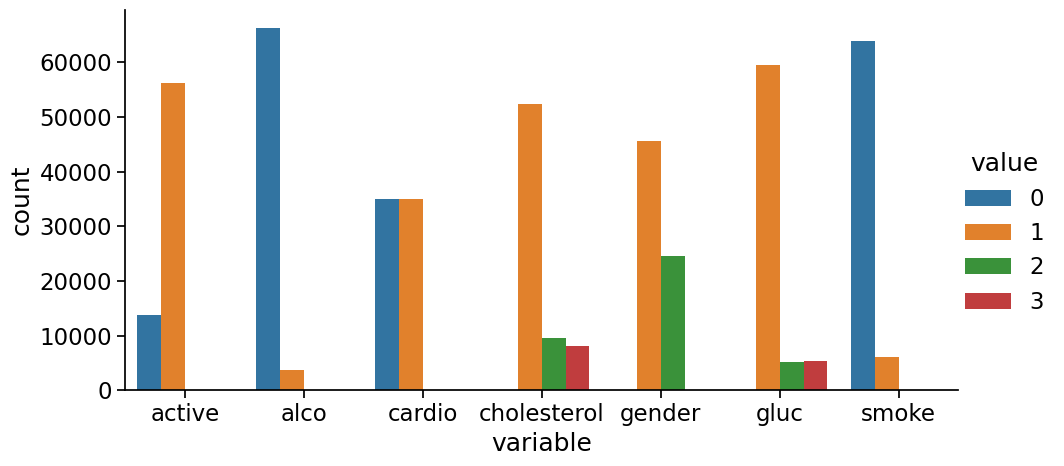

In [75]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol','gluc', 'smoke', 'alco','active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable','value'])['value'].count()).sort_index(level=[0, 1]).rename(columns={'value': 'count'}).reset_index()
sns.catplot(x='variable', y='count', hue='value', data=df_uniques, kind='bar', aspect=2)


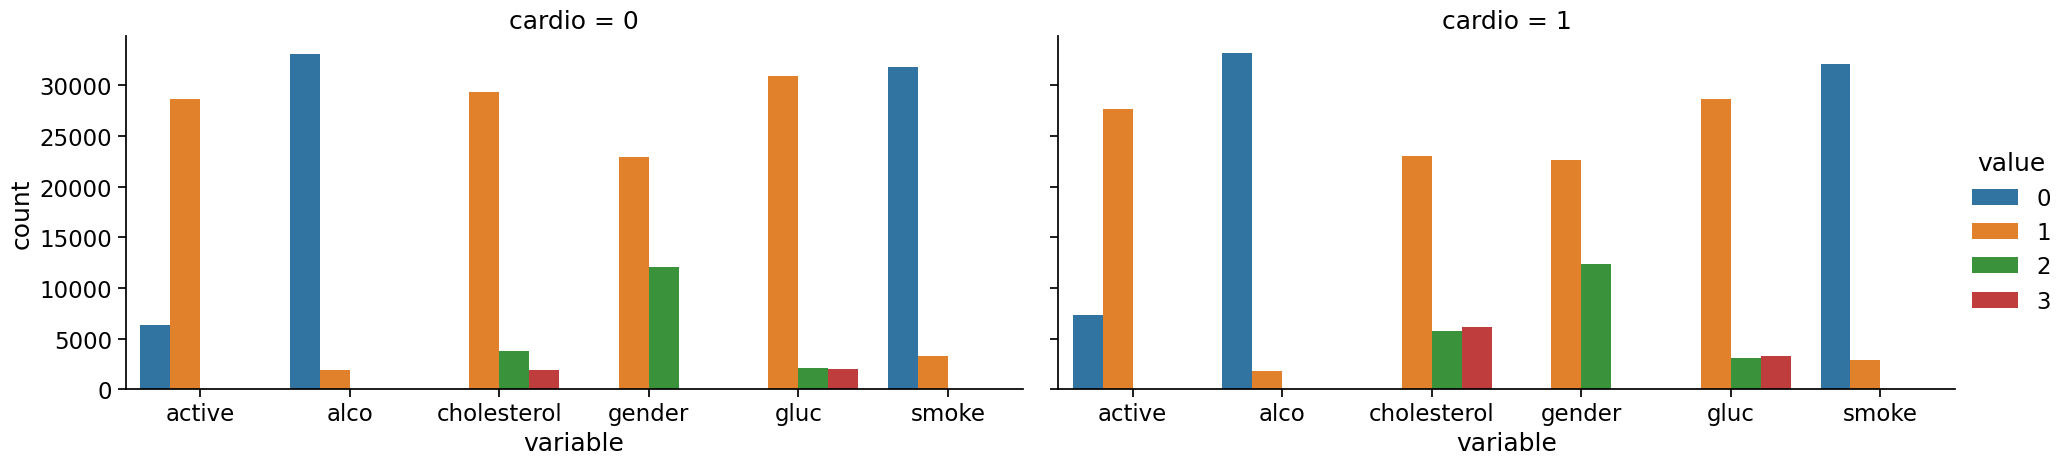

In [76]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol','gluc','smoke', 'alco','active'],id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value','cardio'])['value'].count()).sort_index(level=[0, 1]).rename(columns={'value': 'count'}).reset_index()
sns.catplot(x='variable', y='count', hue='value', col='cardio', data=df_uniques, kind='bar', aspect=2)


In [64]:
for c in df.columns:
 n = df[c].nunique()
 print(c)
 if n <= 3:
    print(n, sorted(df[c].value_counts().to_dict().items()))
 else:
    print(n)
print(10 * '-')


age
8076
gender
2 [(1, 45530), (2, 24470)]
height
109
weight
287
ap_hi
153
ap_lo
157
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
smoke
2 [(0, 63831), (1, 6169)]
alco
2 [(0, 66236), (1, 3764)]
active
2 [(0, 13739), (1, 56261)]
cardio
2 [(0, 35021), (1, 34979)]
----------


Завдання 5. Провести візуальний аналіз
1. Кореляційна матриця
2. Розподіл росту людини за гендерною ознакою
3. Рангова кореляція
  
   3.1 Які ознаки найбільше корелюють одна з одною за Спірменом?
  
   3.2 Чому значення рангової кореляції у цих ознаках таке велике
(відносно)?
5. Вік

gender, height


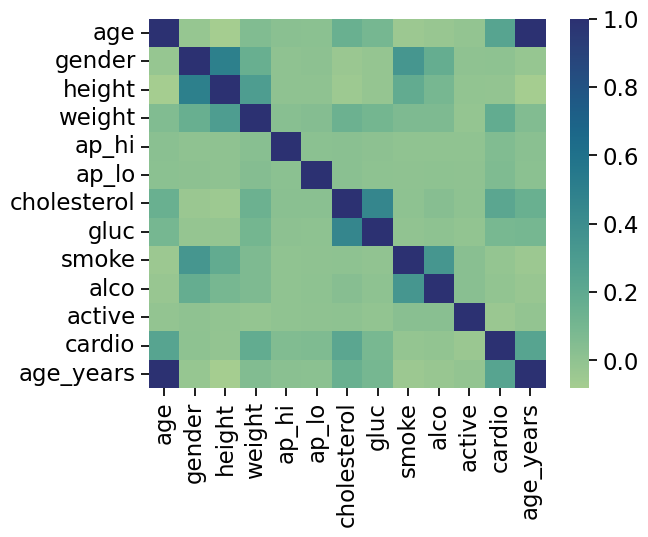

In [80]:
sns.heatmap(df.corr(), cmap="crest")
print ('gender, height')

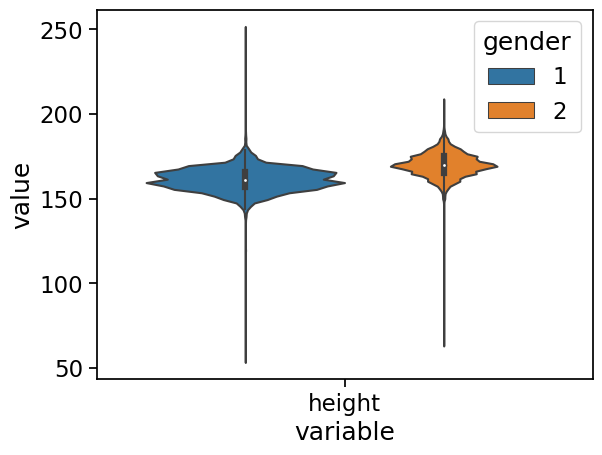

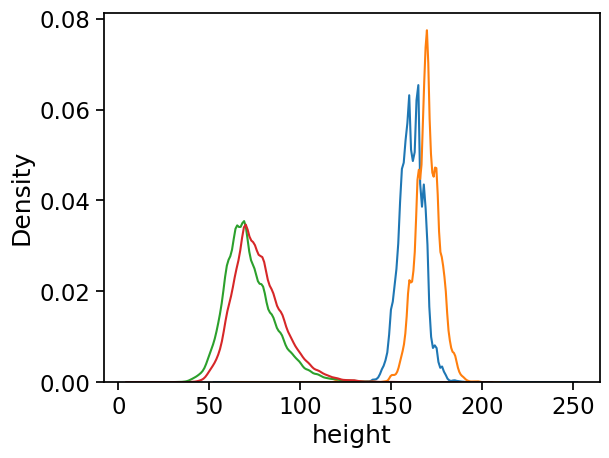

In [71]:
longformat = pd.melt(frame=df, value_vars='height', id_vars='gender')
longformat.head()

sns.violinplot(data=longformat, x='variable', y='value', hue='gender', scale='count');
plt.show()
sns.kdeplot(df[df['gender'] == 1]['height'])
sns.kdeplot(df[df['gender'] == 2]['height'])
sns.kdeplot(df[df['gender'] == 1]['weight'])
sns.kdeplot(df[df['gender'] == 2]['weight'])
plt.show()


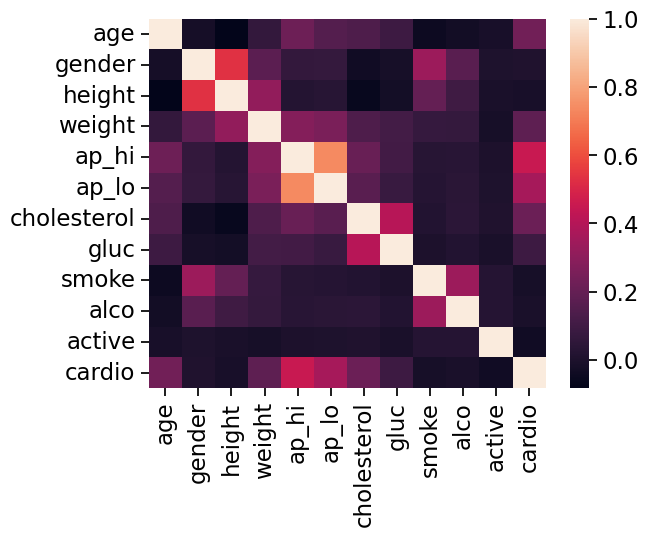

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.020176,-0.082292,0.061559,0.219087,0.156700,0.140113,0.091791,-0.047471,-0.030078,-0.010422,0.234429
gender,-0.020176,1.000000,0.533805,0.172480,0.063174,0.066374,-0.035730,-0.018866,0.338135,0.170966,0.005866,0.008109
height,-0.082292,0.533805,1.000000,0.313569,0.019381,0.030534,-0.058940,-0.024369,0.197632,0.096670,-0.007367,-0.012383
weight,0.061559,0.172480,0.313569,1.000000,0.277749,0.254420,0.137908,0.109901,0.071676,0.068088,-0.014894,0.182701
ap_hi,0.219087,0.063174,0.019381,0.277749,1.000000,0.735436,0.208722,0.105334,0.028929,0.033243,-0.001268,0.451885
ap_lo,0.156700,0.066374,0.030534,0.254420,0.735436,1.000000,0.167401,0.082474,0.026172,0.038862,0.003401,0.362572
cholesterol,0.140113,-0.035730,-0.058940,0.137908,0.208722,0.167401,1.000000,0.407803,0.015220,0.041285,0.007573,0.215117
gluc,0.091791,-0.018866,-0.024369,0.109901,0.105334,0.082474,0.407803,1.000000,0.000468,0.018584,-0.008610,0.091488
smoke,-0.047471,0.338135,0.197632,0.071676,0.028929,0.026172,0.015220,0.000468,1.000000,0.340094,0.025858,-0.015486
alco,-0.030078,0.170966,0.096670,0.068088,0.033243,0.038862,0.041285,0.018584,0.340094,1.000000,0.025476,-0.007330


In [72]:
sns.heatmap(df.corr(method='spearman'));
plt.show()
df.corr(method='spearman')

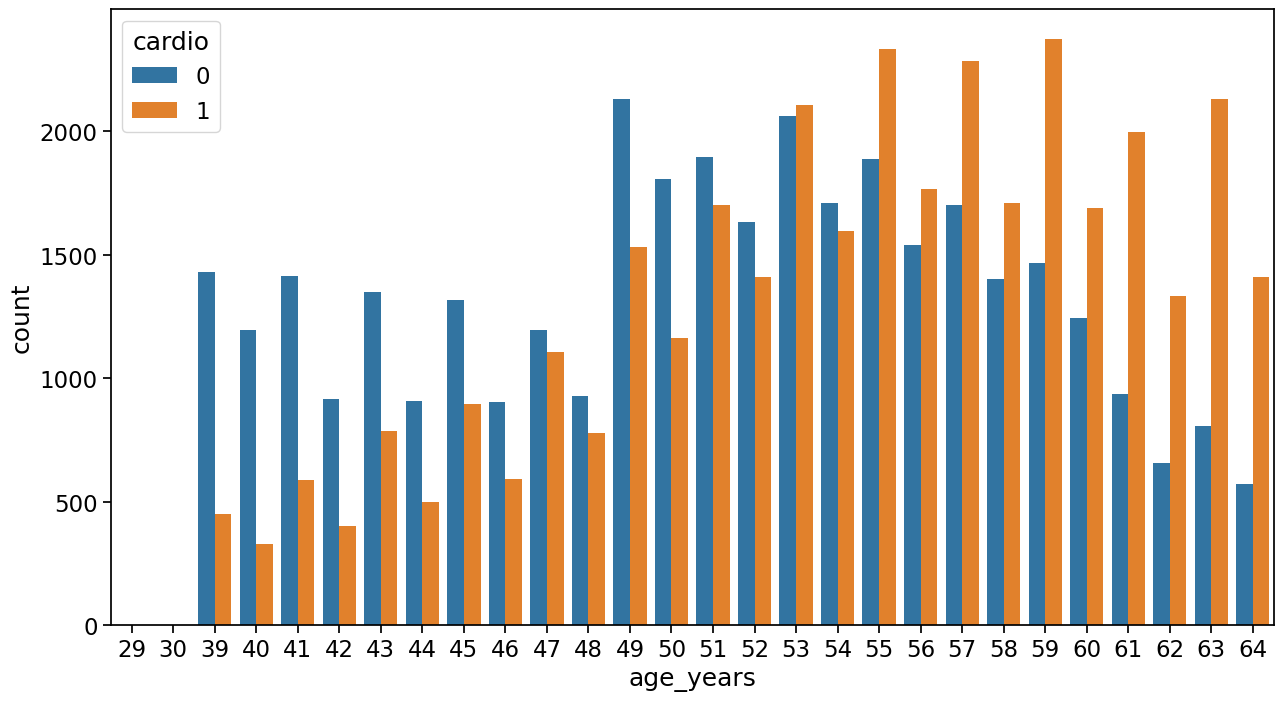

In [79]:
df['age_years'] = (df['age'] // 365.25).astype(int)
plt.figure(figsize=(15,8), dpi=100)
sns.countplot(x='age_years', hue='cardio', data=df);


Завдання 6. Провести розвідувальний і візуальний аналіз для набору
даних: Predict students' dropout and academic success
(https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-ofstudent-retention)


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
data2 = pd.read_csv('dataset.csv')

Saving dataset.csv to dataset.csv


   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       

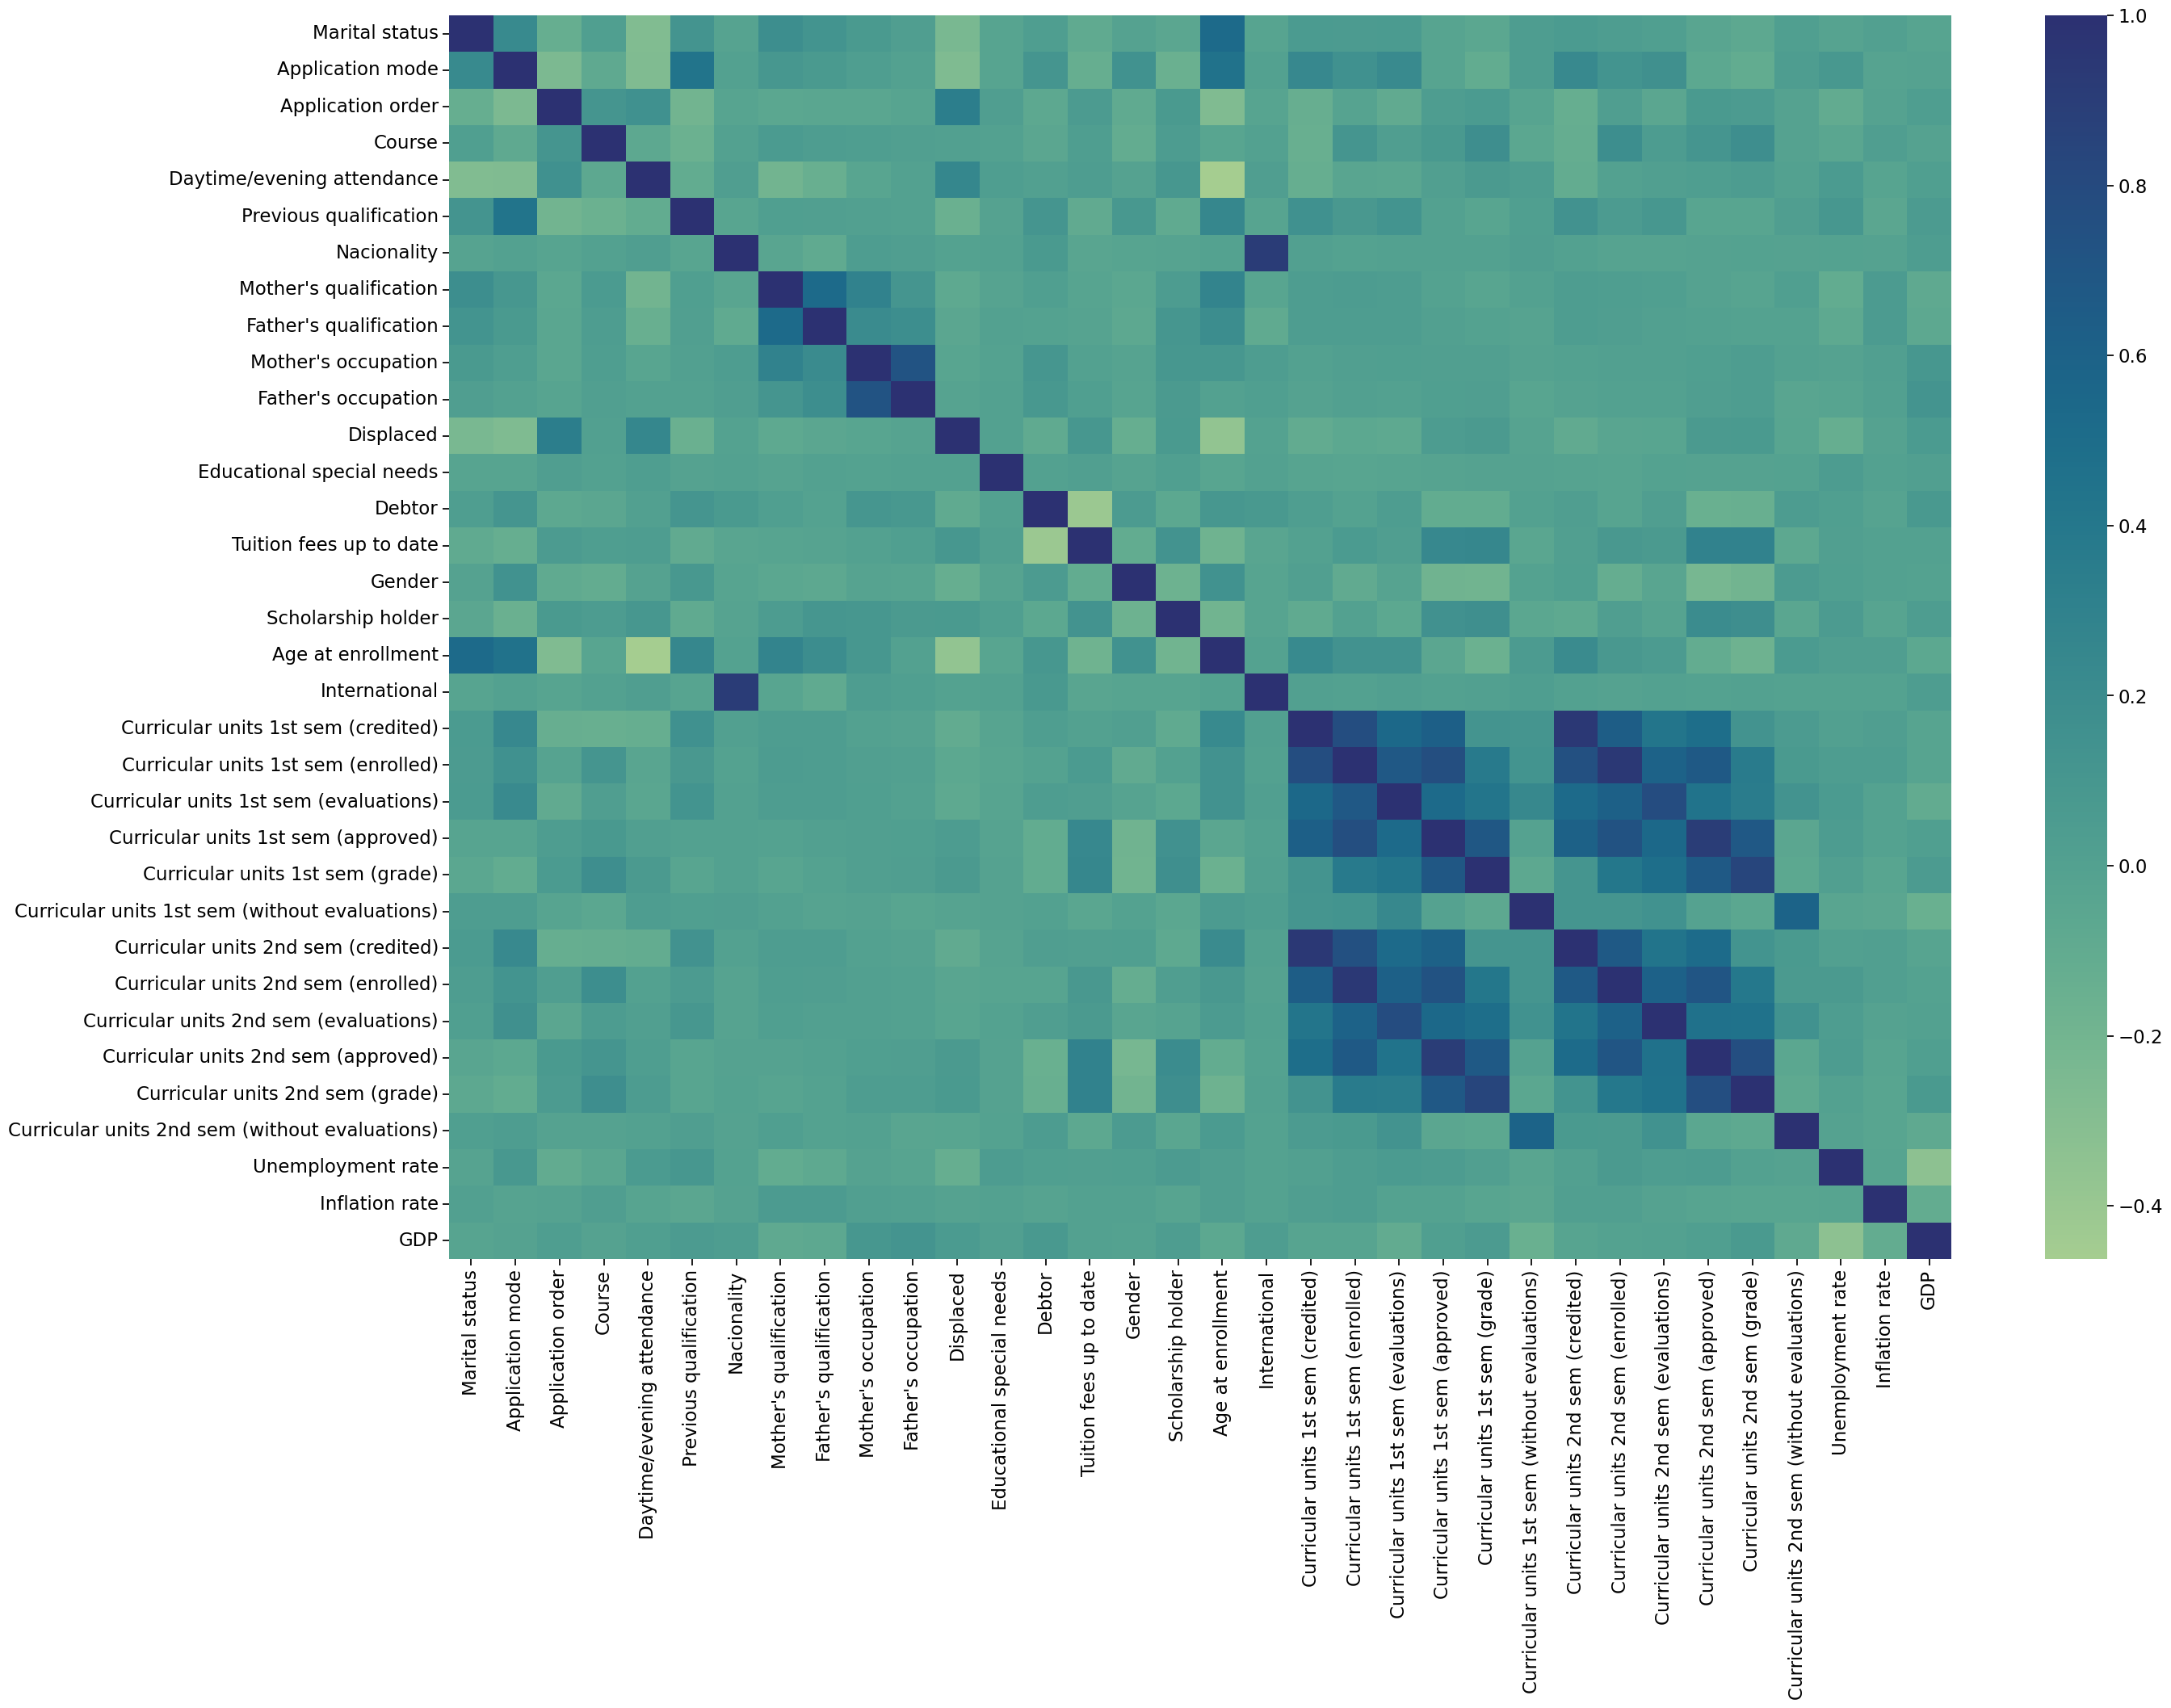

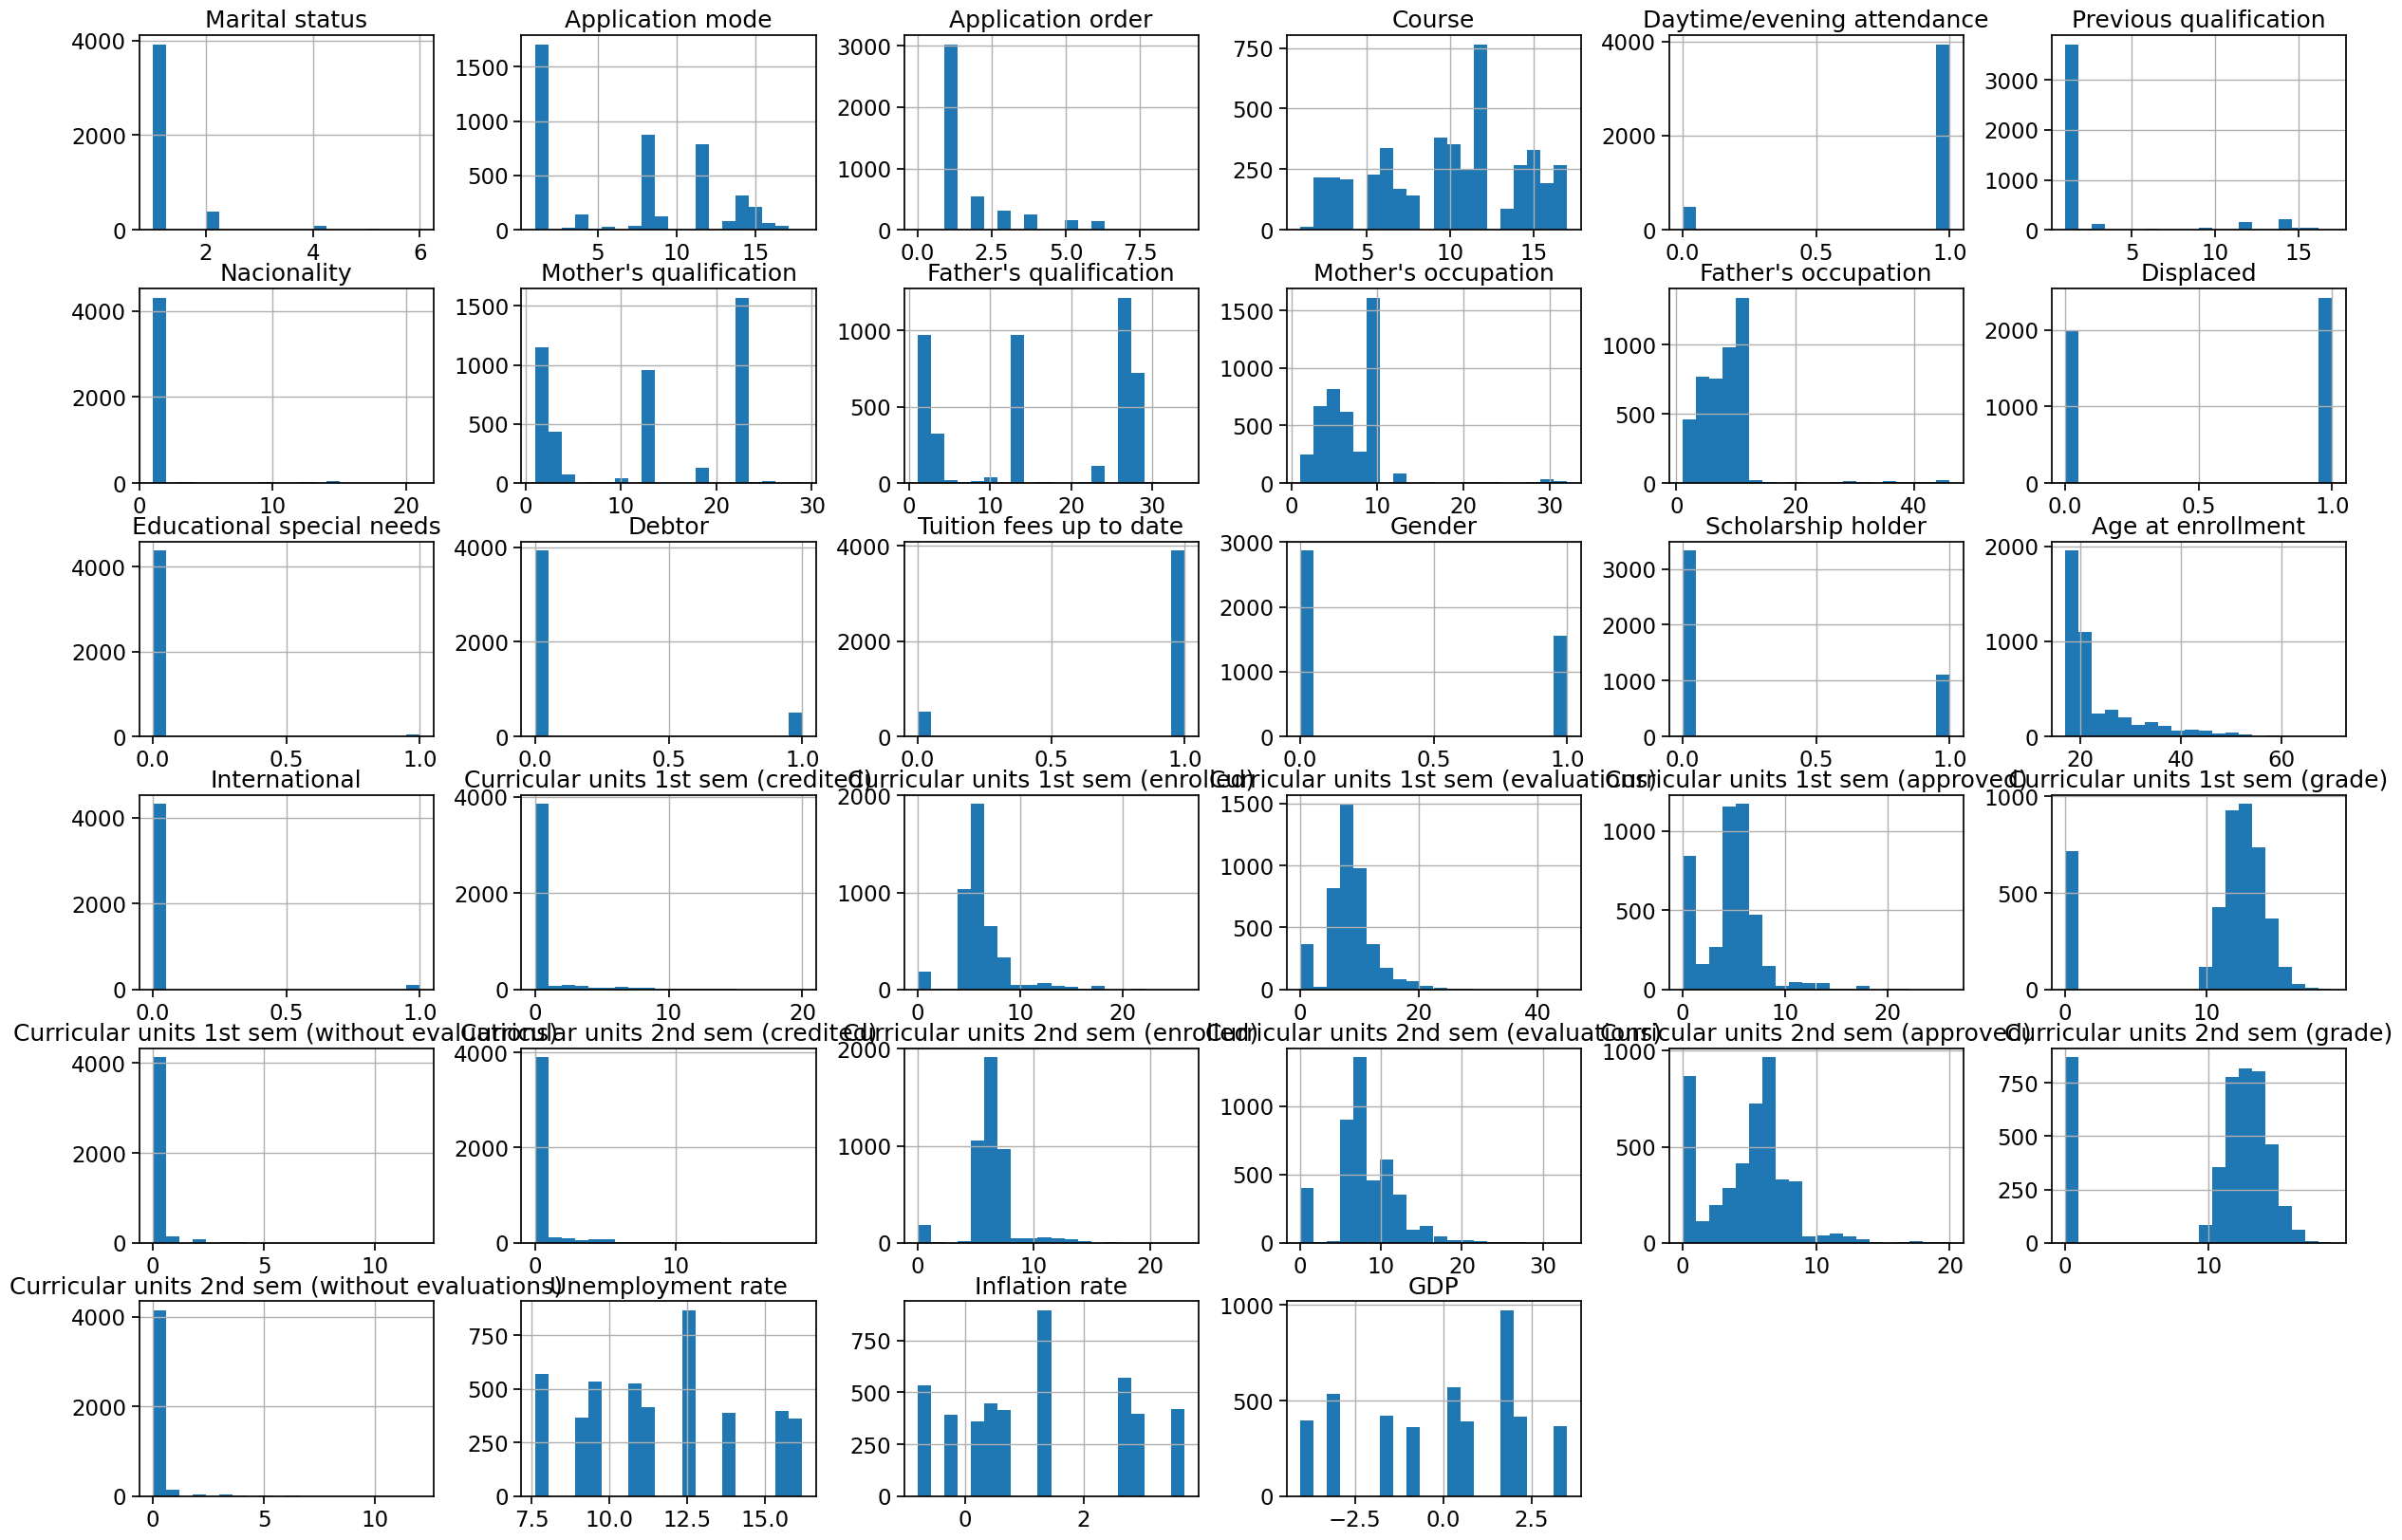

In [85]:
print(data2.head())

print(data2.info())

print(data2.describe())

print(data2.shape)
plt.figure(figsize=(30,20), dpi=100)
sns.heatmap(data2.corr(), cmap="crest")

data2.hist(bins=20, figsize=(30,20))
plt.show()